# Homework 3: Feature Engineering, KNN, and Decision Trees

By Rachel Manzelli and Brian Kulis with the help of N. Frumkin, K. Chauhan, and A. Tsiligkaridis


*Wine classification dataset from the UCI Machine Learning Repository: http://archive.ics.uci.edu/ml/datasets/Wine*

*Sea level dataset from NASA's climate change repository: https://climate.nasa.gov/vital-signs/*

## Preamble

Download the `hw3` folder from here: https://github.com/nfrumkin/EC414/tree/master/homework/hw3 (or clone the EC414 repository, if you prefer).

To run and solve this assignment, you must have a working Jupyter Notebook installation.

If you followed the installation instructions for `Python 3.6.x` and `Jupyter Notebook` from discussion 1, you should be set. In a terminal (cmd or Powershell for Windows users), navigate to the `hw3` folder. Then type `jupyter notebook` and press `Enter`.

If you have Anaconda, run Anaconda and choose this file (`EC414_HW3.ipynb`) in Anaconda's file explorer. Use `Python 3` version.

Below statements assume that you have already followed these instructions. If you need help with Python syntax, NumPy, or Matplotlib, you might find [Week 1 discussion material](https://github.com/nfrumkin/EC414/blob/master/discussions/Week%201%20-%20Python%20Review.ipynb) useful. 

To run code in a cell or to render [Markdown](https://en.wikipedia.org/wiki/Markdown)+[LaTeX](https://en.wikipedia.org/wiki/LaTeX) press `Ctrl+Enter` or `[>|]` ("play") button above. To edit any code or text cell [double] click on its content. To change cell type, choose "Markdown" or "Code" in the drop-down menu above.

Put your solution into boxes marked with **`[double click here to add a solution]`** and press Ctrl+Enter to render text. [Double] click on a cell to edit or to see its source code. You can add cells via **`+`** sign at the top left corner.

Submission instructions: please upload your completed solution file(s) to Blackboard by the due date (see Schedule).

## Problem 1: Feature Engineering

Given the sea level rise data over the past 25 years as a training set (`sealevel_train.csv`) and the past year's sea level rise data as a testing set (`sealevel_test.csv`):

**a.** Apply Ordinary Least Squares regression on the training data. Plot both the training data and the regression curve on the same figure. *(Hint: use your code from Homework 2!)*

**b.** Using the testing set, calculate the mean squared error (MSE) between the ground truth testing data and the prediction given by your regression curve from part a. Recall that the mean squared error is given by $MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2$, where $y$ is the vector of $n$ observed values and $\hat{y}$ is the vector of $n$ predictions.

**c.** In machine learning, we often manipulate the raw data into some intermediary form to create a more robust feature representation. Repeat parts a. and b. for each of the following data transformations. *Be sure to apply the same transformation to the testing set before finding the MSE between the test data and the prediction.*

* Apply a rolling mean with a window size of 5, 7, and 15. This transformation is given by $x_j = \sum_{k=i}^{i+window size}(\frac{x_k}{windowsize})$. With the $n$ data points given, pad the final values with zero. (For example, the mean at $n-2$ includes points $n-2$, $n-1$, and $n$, and will be 0 for $n+1$ and $n+2$ because we do not have data for those points.)

* Apply first order differencing. The transformation is given by $x_{j} = x_i - x_{i-1}$ for every data point $x_i$ in the dataset, excluding the first data point.

* One other data transformation of your choice. *Be sure to explain your transformation.*

In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

In [3]:
# Read training set
sea_level_df = pd.read_csv("sealevel_train.csv")
sea_level_df.head()

,time,level_variation
0,1993.011526,-37.52
1,1993.038692,-38.05
2,1993.065858,-37.61
3,1993.093025,-37.49
4,1993.120191,-36.48


In [4]:
# Read testing set
sea_level_df_test = pd.read_csv("sealevel_test.csv")
sea_level_df_test.head()

,time,level_variation
0,2013.453940,26.31
1,2013.481106,26.32
2,2013.508272,26.44
3,2013.535439,26.54
4,2013.562605,26.49


The coefficents are: 2.900211439273546 -5815.006447602187


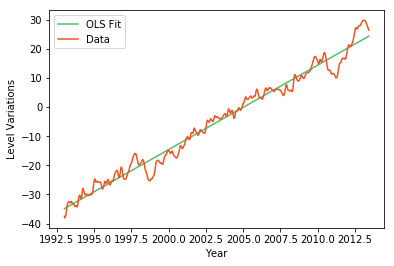

In [5]:
# Part a - Fit linear regression model to training data (find OLS coefficients) #


# Predict using OLS model

# Collecting X and Y
X = sea_level_df['time'].values
Y = sea_level_df['level_variation'].values
y_test = sea_level_df_test['level_variation'].values
x_test =  sea_level_df_test['time'].values


# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
m = len(X)

# Using the formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# Print coefficients
print("The coefficents are:",b1, b0)

# Plot training data along with the regression curve

max_x = np.max(X)
min_x = np.min(X) 

# Calculating line values x and y
#x = np.linspace(min_x, max_x, 700)
y = b0 + b1 * X

y_test_predict = b0 + b1*x_test

# Ploting Data
plt.plot(X, y, color='#58b970', label='OLS Fit')
# Ploting OLS fit
plt.plot(X, Y, c='#ef5423', label='Data')

plt.xlabel('Year')
plt.ylabel('Level Variations')
plt.legend()
plt.show()

In [6]:
# Part b - Prediction of testing points #
#Calculating MSE

MSE = mean_squared_error(y_test,y_test_predict)

print("The MES is",MSE)

# Calculate mean squared error between ground truth and predictions

The MES is 90.73366367291743


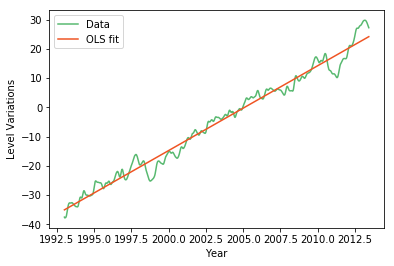

Sea Level varition vs. Year for window: 5


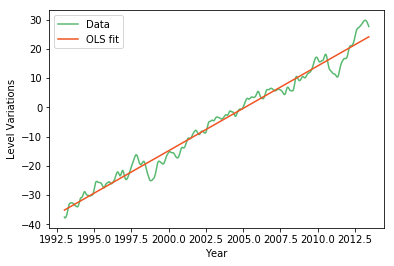

Sea Level varition vs. Year for window: 7


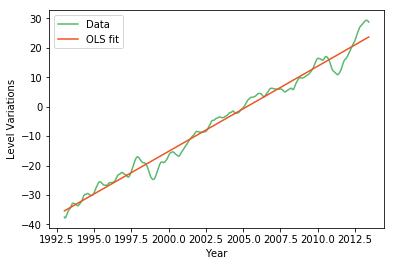

Sea Level varition vs. Year for window: 15


In [7]:
# Part c - data transformations #
# ROLLING MEAN
window_size = [5,7,15]

for i in window_size:

    min_periods = 1

    Data_frame = sea_level_df.rolling(i, min_periods=1).mean()
    y_rolling = Data_frame['level_variation'].values
    
    #reshape data
    X = X.reshape(-1, 1)
    y_rolling = y_rolling.reshape(-1,1)
    #x_test = x_test.reshape(-1,1)


    #apply linear regression
    ols_model = LinearRegression()
    ols_model.fit(X,y_rolling)
    coefs = ols_model.coef_
    
    #Predictions
    x_pred = sea_level_df_test['time'].values
    y_pred = ols_model.predict(X)
    y_pred = y_pred.reshape(-1,1)

    # Ploting Data
    plt.plot(X, y_rolling, color='#58b970', label='Data')
    # Ploting OLS
    plt.plot(X, y_pred, c='#ef5423', label='OLS fit')

    plt.xlabel('Year')
    plt.ylabel('Level Variations')
    plt.legend()
    plt.show()

    print('Sea Level varition vs. Year for window:', i)

    

In [8]:

#Calculating MSE for rolling mean

MSE = mean_squared_error(y_rolling,y_pred)

print("The MES is for rolling mean is",MSE)

# Calculate mean squared error between ground truth and predictions

The MES is for rolling mean is 5.709165730299713


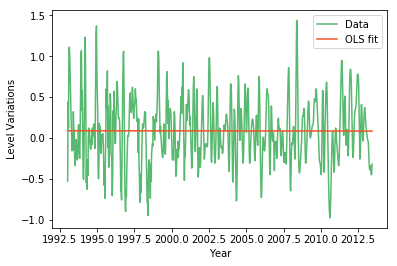

diff - Sea Level varition vs. Year


In [9]:
# Part c - data transformations #
# FIRST ORDER DIFFERENCING

#New_Data_frame = sea_level_df.diff(periods=1,axis = 0)
#y_diff = Y_train.diff

X_train = sea_level_df.drop('level_variation',axis=1)
Y_train = sea_level_df[['level_variation']]

Y_train_2 = Y_train.diff(periods = 1)[1:]
X_train_2 = X_train[1:]
#x_alt = X[1:]

#X_f = x_test.reshape(-1, 1)

#apply linear regression
diff_ols_model = LinearRegression()
diff_ols_model.fit(X_train_2,Y_train_2)
diff_coefs = diff_ols_model.coef_






#Predictions
x_pred_diff = sea_level_df_test['time'].values
y_pred_diff = diff_ols_model.predict(X_train_2)
#y_pred_diff = y_pred_diff.reshape(-1,1)

# Ploting Data fit
plt.plot(X_train_2, Y_train_2, color='#58b970', label='Data')
# Ploting OLS
plt.plot(X_train_2, y_pred_diff, c='#ef5423', label='OLS fit')

plt.xlabel('Year')
plt.ylabel('Level Variations')
plt.legend()
plt.show()

print('diff - Sea Level varition vs. Year')


In [10]:

#Calculating MSE for diff

MSE = mean_squared_error(Y_train_alt,y_pred_diff)

print("The MES is for diff is",MSE)

# Calculate mean squared error between ground truth and predictions

NameError: name 'Y_train_alt' is not defined

In [ ]:
# Part c - data transformations #
# YOUR OWN TRANSFORMATION 
# I changed the window size to something large to see the change in the curve

print('Sea Level varition vs. Year for window: 20')
window_size = 30


min_periods = 1

Data_frame = sea_level_df.rolling(i, min_periods=1).mean()
y_rolling = Data_frame['level_variation'].values

#reshape data
X = X.reshape(-1, 1)
y_rolling_new = y_rolling.reshape(-1,1)



#apply linear regression
ols_model = LinearRegression()
ols_model.fit(X,y_rolling)
coefs = ols_model.coef_

#Predictions
x_pred = sea_level_df_test['time'].values
y_pred = ols_model.predict(X)
y_pred_new = y_pred.reshape(-1,1)

# Ploting Data
plt.plot(X, y_rolling_new, color='#58b970', label='OLS Fit')
# Ploting OLS fit
plt.plot(X, y_pred_new, c='#ef5423', label='Data')

plt.xlabel('Year')
plt.ylabel('Level Variations')
plt.legend()
plt.show()



In [ ]:
#Calculating MSE for rolling mean

MSE = mean_squared_error(y_rolling_new,y_pred_new)

print("The MES is for rolling mean is",MSE)

# Calculate mean squared error between ground truth and predictions

## Problem 2: K-Nearest Neighbors

Consider the following five two-dimensional training points, belonging to class + or class -:

$(0,1,+)$

$(1,1,-)$

$(2,2,+)$

$(2,0,+)$

$(3,1,-)$

**a.** Plot these five points. Then, draw the decision boundary for a **1-nearest-neighbor classifier (with Euclidean distance).** *Be sure to show or explain how you found your decision boundary.*

**b.** Classify the following test points, and add them to your plot:

$(0,0)$

$(1,2)$

$(2,1)$

$(3,3)$

$(4,3)$

*Be sure to explain how you classified the test points.*

**c.** As you may or may not have seen in part b, it is possible for two neighbors with different class labels to have identical distances to a test point. In that case, explain how to choose a class for this point.


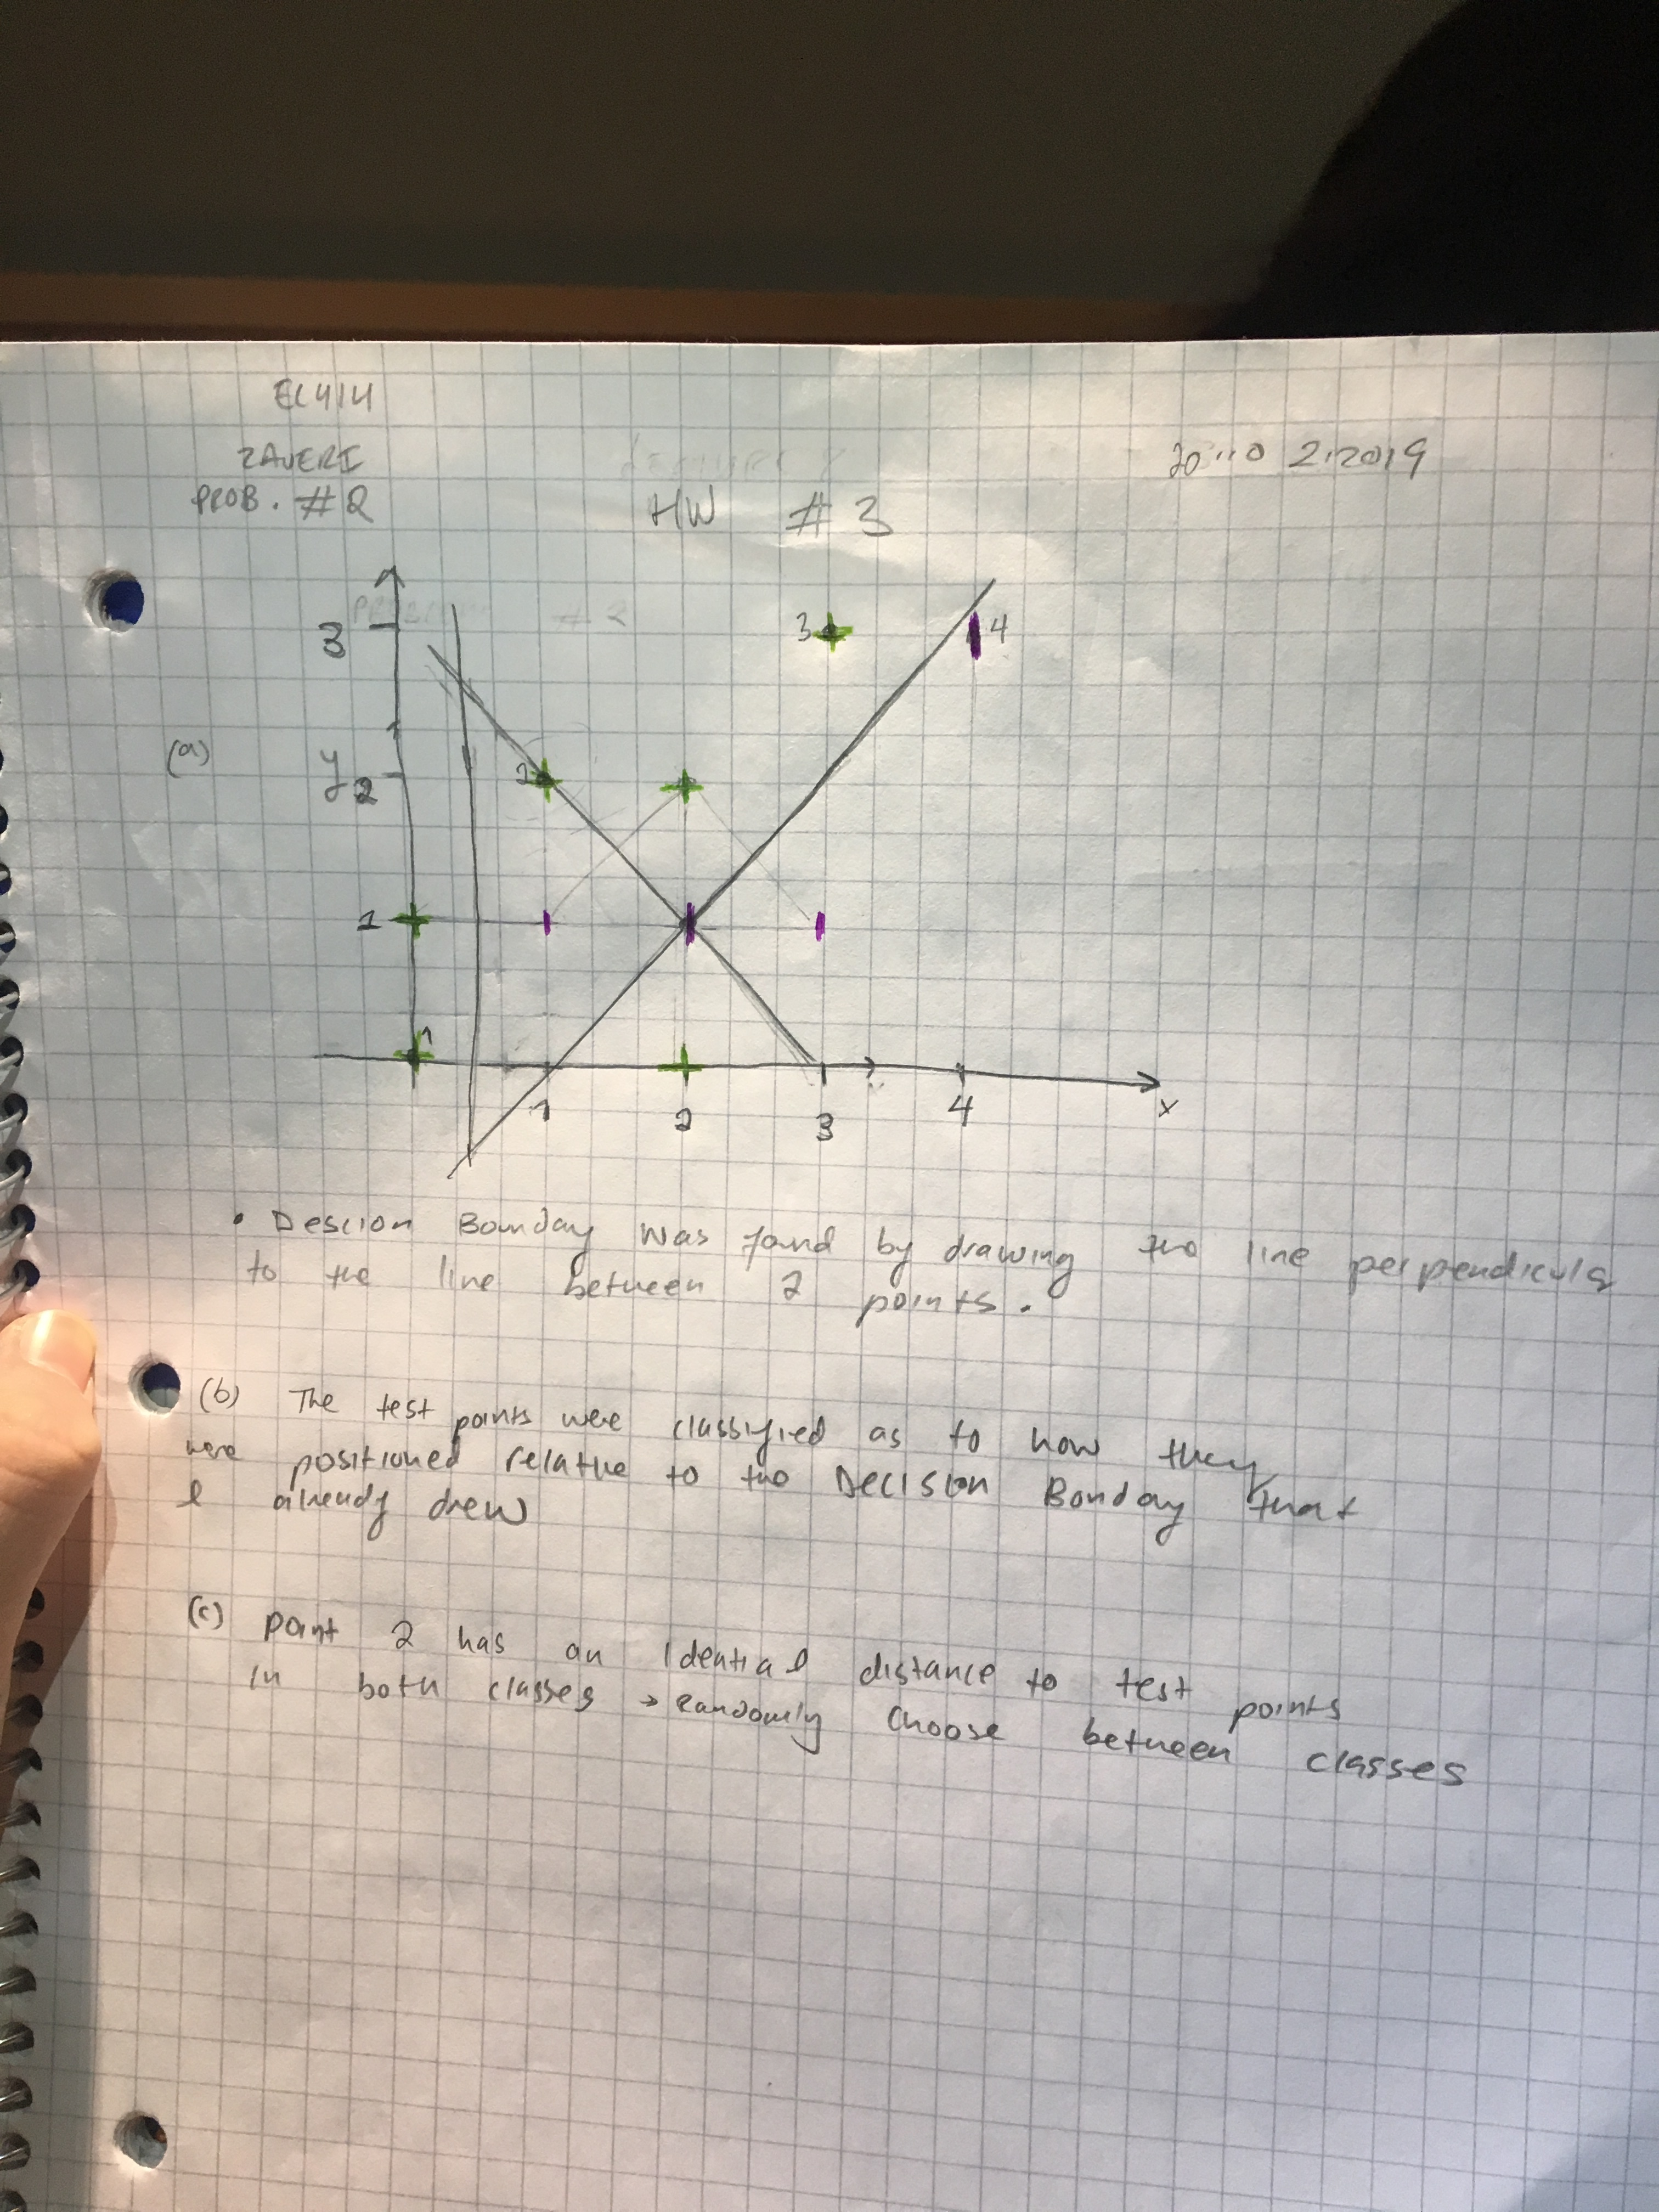


(a) Decision boundary was found by drawing the lines perpendicular the the line between 2 points. 

(b) The test points were classified as to how they were positioned relative to the decision boundary that I already drew

(c) 2 points were on the decision boundary and in these cases we can randomly choose which class they fall into. So I assigned them randomly. 

## Problem 3: Nearest Neighbors vs. Decision Trees

Not all machine learning algorithms perform well on all types of data; performance is often dependent on how the data is distributed. We ask you to compare the performance accuracies of k-nearest neighbors and decision trees on two datasets: the Iris dataset and the wine dataset.

The Iris flower dataset contains samples of attributes of 3 different variations of Iris flowers. This dataset has become very commonly used in training classification models. In fact, it has become so common that it exists within scikit-learn. The wine dataset contains attributes of 3 different types of wine. The datasets are imported and split into training and testing sets below for you. You can also get a preview of what they look like by running the two cells below.

**a.** Using the `KNeighborsClassifier` and `DecisionTreeClassifier` from scikit-learn, train and test k-nearest neighbors and decision trees on both datasets. When training the k-nearest neighbor algorithm, **do not choose a random number of neighbors, but instead *find the k that achieves the best accuracy in the range 1-10***. Compute the accuracies of each method (hint: you can use scikit-learn's `metrics.accuracy_score`).

**b.** Compare the accuracies of each algorithm on each dataset. **If there is a difference in their performance, why do you think this would be?**

*Please note that since sampling of data is random, accuracies may differ when you run the code again, and they will differ among your peers.*

In [11]:
# Import Iris dataset from scikit-learn, as well as algorithms
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

# Load Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

# Split data into training and testing sets
X = iris.data
y = iris.target

X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X, y, test_size = 0.3) # here, our test set is 30% of whole set

# Show what Iris data looks like
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
# Load wine dataset
wine_df = pd.read_csv("wine.csv", names = ["class", "alc", "malic acid", "ash", "alcalinity", "mg", "phenols", "flavanoid", "nonflav phenols", "proanth", "color", "hue", "OD280/OD315", "proline"])

# Split dataset into train and test sets
X = wine_df
y = wine_df.pop('class')

X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(X, y, test_size = 0.3)

# Show what wine dataset looks like
wine_df.head()

,alc,malic acid,ash,alcalinity,mg,phenols,flavanoid,nonflav phenols,proanth,color,hue,OD280/OD315,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [13]:
# IRIS DATASET #

# Construct the nearest neighbors classifier.
# Fit the model to the data, and find the k which achieves the best accuracy in the range 1-10.
# Test KNN with testing set

knn =  KNeighborsClassifier(n_neighbors = 1)

knn.fit(X_iris_train,y_iris_train)

#predict
predict2 = knn.predict(X_iris_test)

acc = str(accuracy_score(y_iris_test, predict2))

print('KNN best accuracy for range 1-10:' , acc)

# Construct a decision tree on the training data.

model = tree.DecisionTreeClassifier()

model.fit(X_iris_train, y_iris_train)
y_predict = model.predict(X_iris_test)

acc1 = accuracy_score(y_iris_test, y_predict)

print('Decision Tree Accuracy:' , acc1)
# Test decision tree with testing set

# Compare accuracies between the two algorithms (print them out)


KNN best accuracy for range 1-10: 0.9777777777777777
Decision Tree Accuracy: 0.9555555555555556


In [14]:
# WINE DATASET #

# Construct the nearest neighbors classifier.
# Fit the model to the data, and find the k which achieves the best accuracy in the range 1-10.
# Test KNN with testing set

knn =  KNeighborsClassifier(n_neighbors = 1)

knn.fit(X_wine_train,y_wine_train)

#predict
predict = knn.predict(X_wine_test)

acc_wine = str(accuracy_score(y_wine_test, predict))

print('KNN best accuracy for range 1-10:' , acc_wine)

# Construct a decision tree on the training data

model = tree.DecisionTreeClassifier()

model.fit(X_wine_train, y_wine_train)
y_predict = model.predict(X_wine_test)

acc_wine_Dt = accuracy_score(y_wine_test, y_predict)

print('Decision Tree Accuracy:' , acc_wine_Dt)
# Test decision tree with testing set

# Compare accuracies between the two algorithms (print them out)


KNN best accuracy for range 1-10: 0.8148148148148148
Decision Tree Accuracy: 0.9259259259259259


For the iris data set KNN produced a more accurate output that the desision tree. This was the opposite for the wine data set. This could because a there were a few outlying points in the wine dataset that made the NN algorithm less accurate. 

## Problem 4: Curse of Dimensionality and Nearest Neighbors

**Please note that you may find it easier to program this question in MATLAB. If you choose to use MATLAB, please submit a separate .m file with your code solution and either insert your plots into Jupyter (or, submit a separate document with the plots through Blackboard).**

Consider $n$ data points uniformly distributed in a $p$-dimensional unit ball centered at the origin, and suppose we are interested in nearest neighbors to the origin. It can be shown that the median distance from the origin to the closest data point under this scenario is given by the expression $(1-(\frac{1}{2})^{\frac{1}{n}})^{\frac{1}{p}}$. 

Now consider the following alternative scenario. Suppose $n$ data points are chosen uniformly
from $[−1, 1]^p$ (the interval $[−1, 1]$ in p dimensions). Now consider the nearest neighbor to a point at the origin in terms of the $l_∞$ norm: $\|x − y\|_∞ = max_i|x_i − y_i|$.

**a.** Write a piece of code that generates $n$ data points in $p$ dimensions distributed uniformly
in $[−1, 1]^p$, and computes the $l_∞$ nearest neighbors to the origin. For $n = 5$, $n = 50$, and $n = 500$, plot the nearest neighbor distances as a function of $p$, for $p = 1$ to $200$. On the same plot(s), also show the curves corresponding to the median distance expression given above.

**b.** What do you observe about the relationship between the formula and the $l_∞$ nearest neighbor distances? *Discuss and interpret all of your plots.*

**c. *Bonus*** Prove a relationship between the ∞ nearest neighbor distances and the above formula.

Part (a)
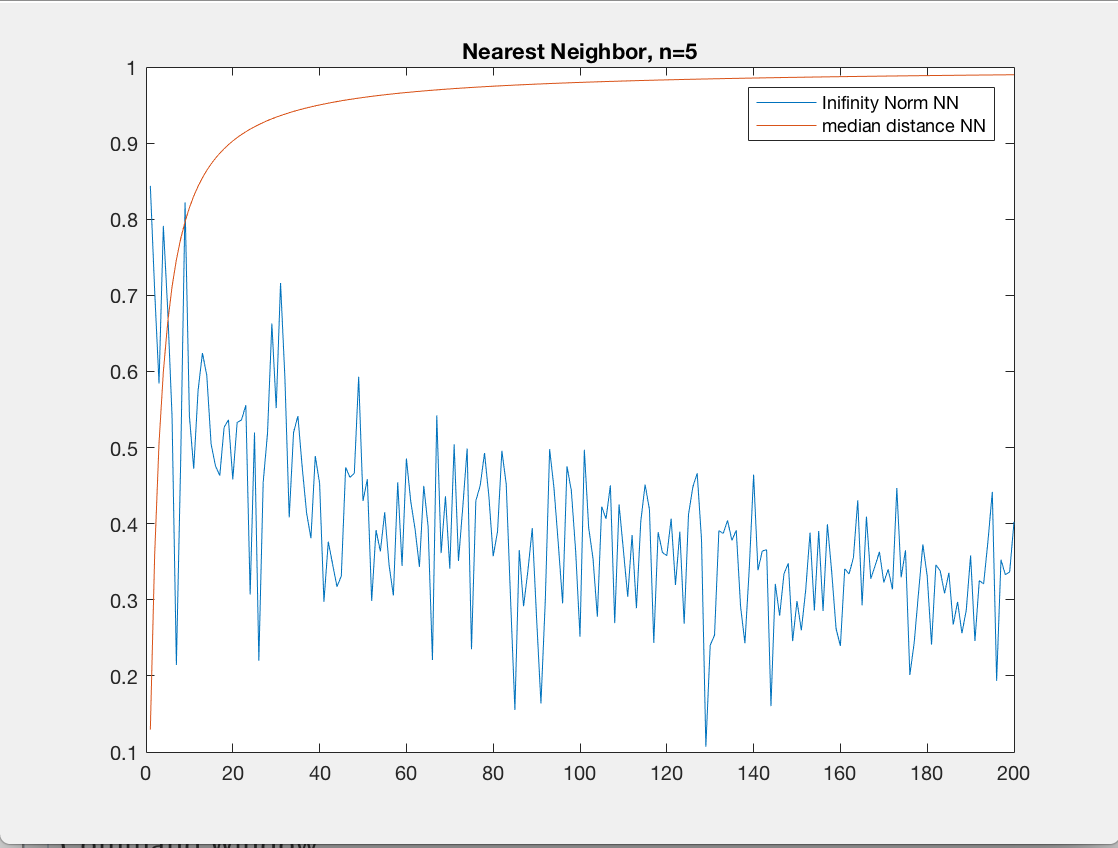
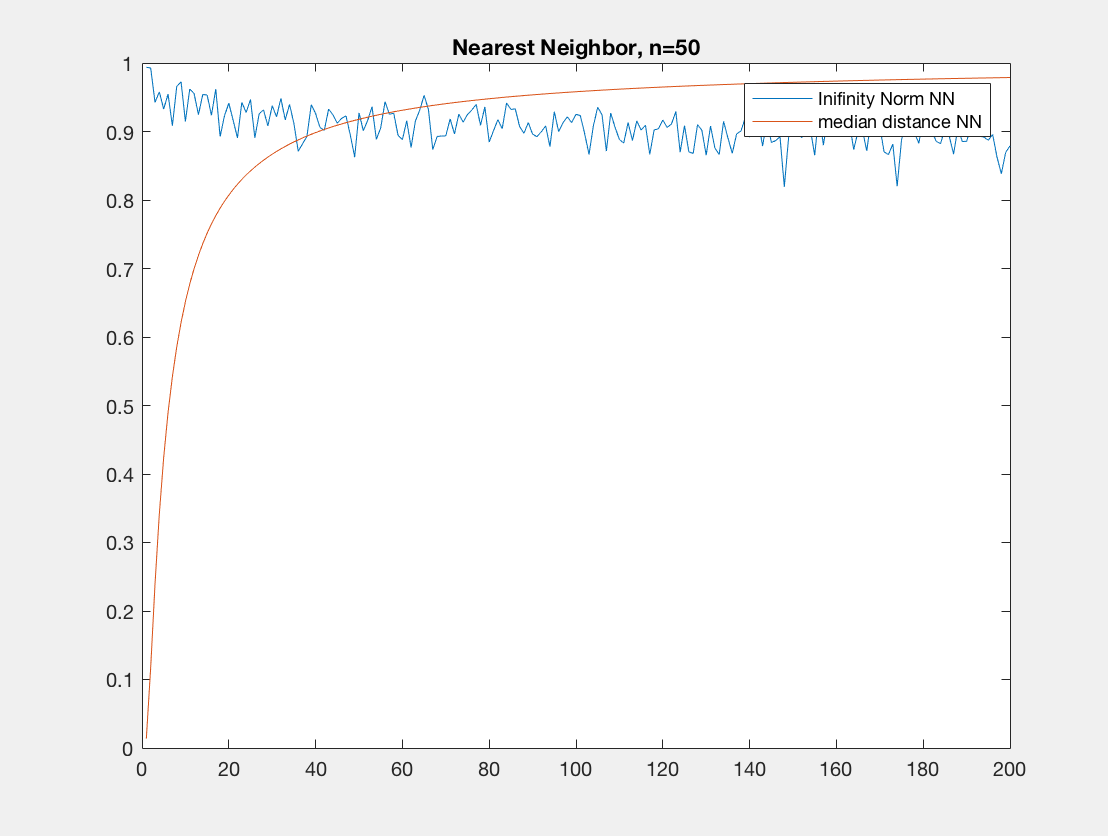
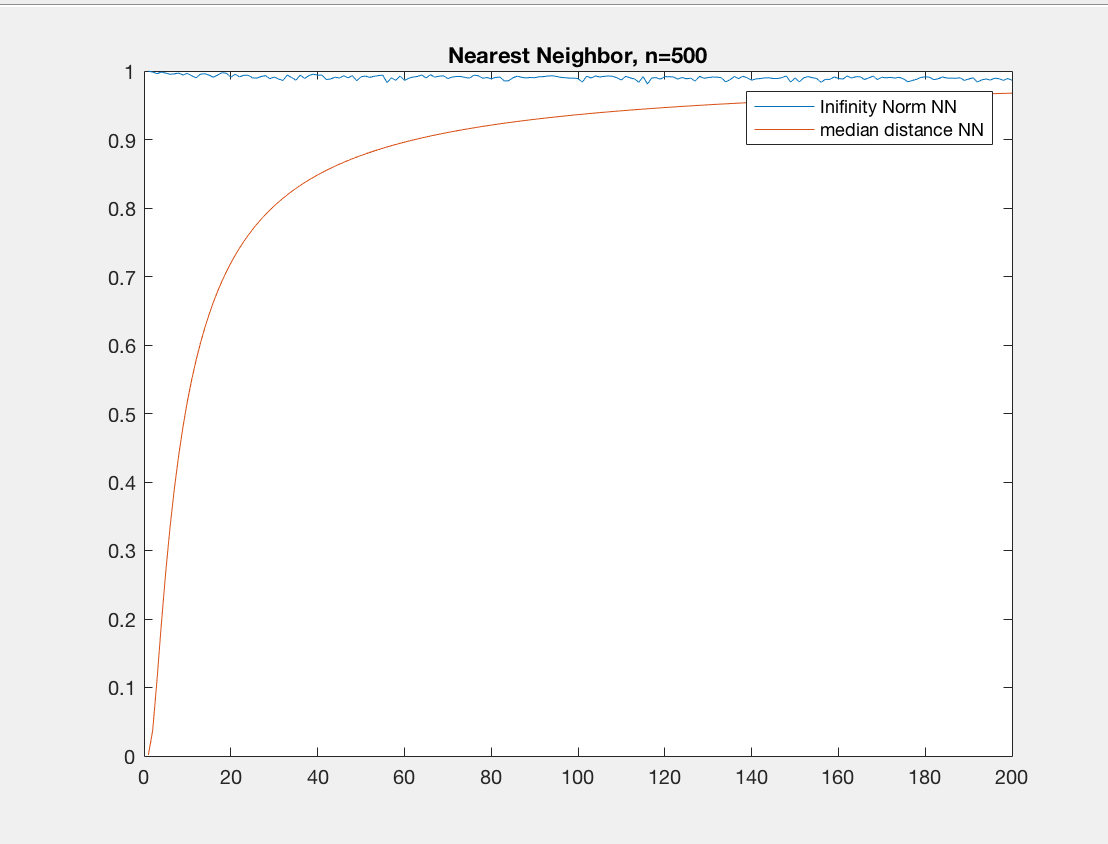

Part (b) 
Discuss and interpret all of your plots. The 𝑙∞ NN distances provides a greater range of values that get closer to 1 when n is increased. In comparison, the median formula provides a smooth curve that stays relatively smooth as n changes, it does indicate that as our values increase the curve gets closer and closer to 1. 